In [1]:
!pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
# Snap ML is available on PyPI. To install it simply run the pip command below.
!pip install snapml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.8 MB/s eta 0:00:00


In [3]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [6]:
# read the input data
raw_data = pd.read_csv("/content/creditcard.csv", on_bad_lines='skip')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

There are 287121 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


# Data Analysis

In [7]:
# display the first rows in the dataset
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.0727811733098497,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.26615071205963,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.34016307473609,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226008082898,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877736754848451,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


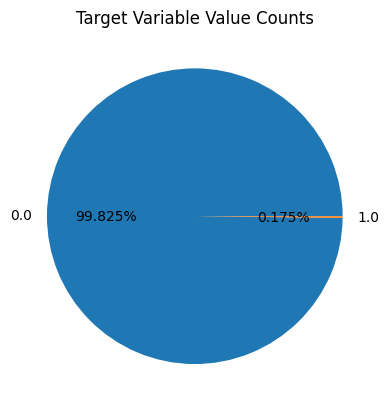

In [10]:
# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# Remove NaN values if any
labels = labels[~np.isnan(labels)]

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

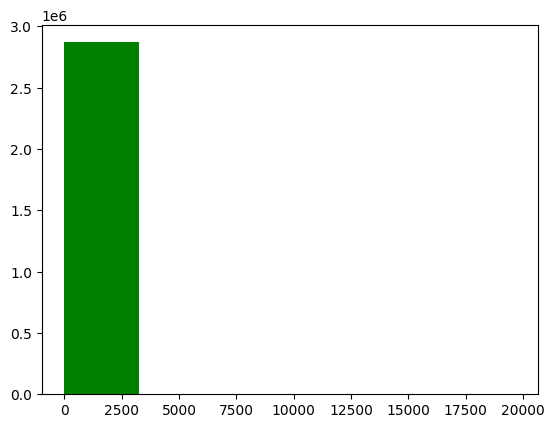

Minimum amount value is  nan
Maximum amount value is  nan
90% of the transactions have an amount less or equal than  nan


In [11]:
# we provide our solution here
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

# Data Preprocessing


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check for non-numeric values in the relevant columns
for col in raw_data.columns[1:30]:
    if raw_data[col].dtype == 'object':
        # Attempt to convert to numeric, handling errors
        try:
            raw_data[col] = pd.to_numeric(raw_data[col], errors='coerce')
        except ValueError as e:
            print(f"Conversion error in column {col}: {e}")

# Fill or drop NaN values resulting from conversion errors (choose one)
# raw_data.fillna(0, inplace=True)  # Fill with 0
# raw_data.dropna(inplace=True)
# Now apply StandardScaler
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])

In [20]:
# Drop rows with NaN
raw_data.dropna(inplace=True)

# Dataset Train/Test Split


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'raw_data' is your DataFrame and 'Class' is the name of your target variable column
X = raw_data.drop('Class', axis=1)
y = raw_data['Class']

# Handle potential NaNs in 'X' after the conversion in the previous step
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (200979, 30) Y_train.shape= (200979,)
X_test.shape= (86134, 30) Y_test.shape= (86134,)


# Build a Decision Tree Classifier model with Scikit-Learn

In [22]:
# compute the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  5.58663


In [26]:
# Convert X_train and y_train to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

t0 = time.time()
snapml_dt.fit(X_train_np, y_train_np, sample_weight=w_train) # Pass NumPy arrays to fit()
snapml_time = time.time()-t0

In [28]:
# trained a Snap ML DecisionTreeClassifier called 'snapml_dt' and timed it
t0 = time.time()
snapml_dt.fit(X_train.to_numpy(), y_train.to_numpy(), sample_weight=w_train) # Convert to NumPy arrays
snapml_time = time.time()-t0

training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test.to_numpy())[:,1] # Convert to NumPy array

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.30x 
[Scikit-Learn] ROC-AUC score : 0.924
[Snap ML] ROC-AUC score : 0.953


#Build a Support Vector Machine model with Scikit-Learn

In [29]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  22.72


In [31]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# to indicate the class imbalance at fit time, set class_weight='balanced'
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=31, fit_intercept=False)

# train a linear Support Vector Machine model using Snap ML
t0 = time.time()
snapml_svm.fit(X_train.to_numpy(), y_train.to_numpy())
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))


# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test.to_numpy()) # Convert to NumPy array

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Snap ML] Training time (s):  21.23
[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 1.07x 
[Scikit-Learn] ROC-AUC score:   0.636
[Snap ML] ROC-AUC score:   0.622


In [33]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test.to_numpy()) # Convert X_test to NumPy array

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_sklearn)) # Corrected variable name here

# the two models should give the same Hinge loss

[Snap ML] Hinge loss:   0.128
[Scikit-Learn] Hinge loss:   0.112


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score

# Define the models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Define scoring functions for cross-validation
scoring = {
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Cross-validate each model and store the results
model_scores = {}
for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    model_scores[model_name] = {
        'roc_auc': scores['test_roc_auc'].mean(),
        'precision': scores['test_precision'].mean(),
        'recall': scores['test_recall'].mean(),
        'f1': scores['test_f1'].mean()
    }
    print(f"{model_name} - ROC AUC: {model_scores[model_name]['roc_auc']:.3f}, "
          f"Precision: {model_scores[model_name]['precision']:.3f}, "
          f"Recall: {model_scores[model_name]['recall']:.3f}, "
          f"F1-Score: {model_scores[model_name]['f1']:.3f}")

# Determine the best model based on a chosen metric (e.g., F1-Score)
best_model_name = max(model_scores, key=lambda k: model_scores[k]['f1'])
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with F1-Score = {model_scores[best_model_name]['f1']:.3f}")


Random Forest - ROC AUC: 0.952, Precision: 0.939, Recall: 0.784, F1-Score: 0.854
Gradient Boosting - ROC AUC: 0.780, Precision: 0.818, Recall: 0.644, F1-Score: 0.717
Neural Network - ROC AUC: 0.693, Precision: 0.508, Recall: 0.299, F1-Score: 0.287

Best Model: Random Forest with F1-Score = 0.854
